*Eduardus Tjitrahardja | @edutjie | 2022*

# Assignment 1 - Heart Disease Classification

## Importing Libraries

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

## Loading Dataset

In [181]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [182]:
print("Dataset Shape: ", df.shape)
df.info()

Dataset Shape:  (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [183]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [184]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

## EDA

### Visualizing Target Distribution

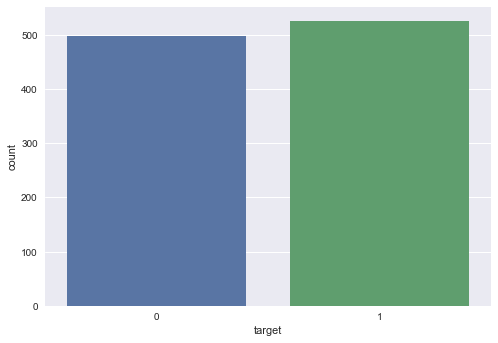

In [185]:
sns.countplot(x='target', data=df)
plt.show()

The target is balanced

In [186]:
features_col = df.columns[:-1]
features_col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### Visualizing Features Distribution

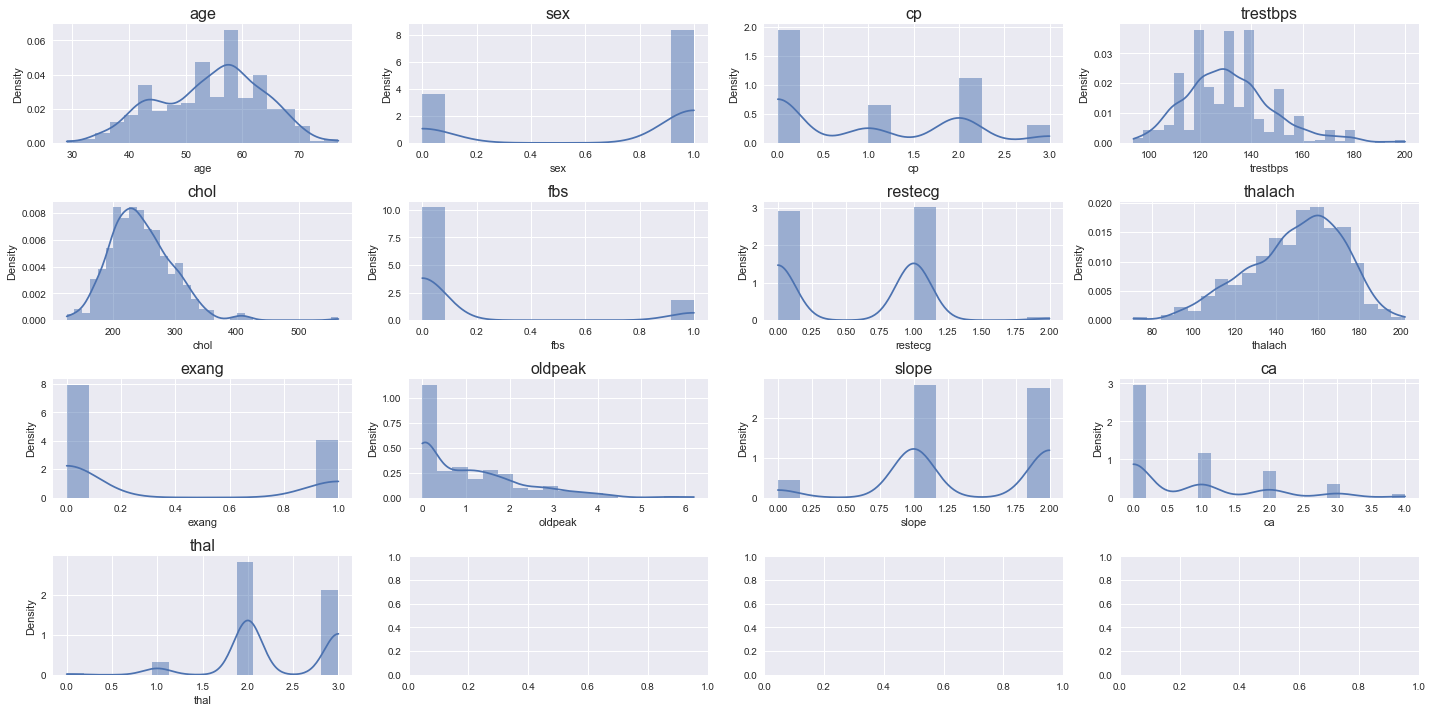

In [187]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))

for i, col in enumerate(features_col):
    sns.histplot(df[col], ax=axes[i // 4, i % 4], kde=True, stat="density", linewidth=0)
    axes[i // 4, i % 4].set_title(col, fontsize=16)
plt.tight_layout()

**Observations:**
- sex, fbs, exang features are binary categorical
- cp, restecg, slope, ca, thal are nominal categorical
- trestbps, chol, oldpeak are right skewed
- thalach is left skewed

In [188]:
bin_cat_cols = ['sex', 'fbs', 'exang']
nom_cat_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
num_cols = list(set(features_col) - set(bin_cat_cols + nom_cat_cols))

print("Binary Categorical Columns", bin_cat_cols)
print("Nominal Categorical Columns", nom_cat_cols)
print("Numerical Columns", num_cols)

Binary Categorical Columns ['sex', 'fbs', 'exang']
Nominal Categorical Columns ['cp', 'restecg', 'slope', 'ca', 'thal']
Numerical Columns ['oldpeak', 'age', 'chol', 'trestbps', 'thalach']


### Detecting Outlier using Z-score

In [189]:
dfz = df[num_cols].copy().add_prefix("z_")
dfz = dfz.apply(lambda x: (x - x.mean()) / x.std())
dfz.head()

,z_oldpeak,z_age,z_chol,z_trestbps,z_thalach
0,-0.060859,-0.268306,-0.659010,-0.377451,0.820920
1,1.726294,-0.158080,-0.833454,0.478874,0.255843
2,1.300782,1.715758,-1.395551,0.764315,-1.048180
3,-0.911884,0.723726,-0.833454,0.935580,0.516648
4,0.705064,0.833952,0.930368,0.364697,-1.874062


In [190]:
outliers_index = []

for col in num_cols:
    outliers_index.extend(dfz[np.abs(dfz["z_" + col]) > 3].index.to_list())
    
outliers_index = list(set(outliers_index))
print(outliers_index)

[641, 393, 267, 526, 151, 665, 158, 294, 296, 685, 175, 688, 559, 179, 54, 55, 958, 192, 833, 450, 69, 326, 464, 481, 996, 613, 246, 889, 378, 123, 508]


### Dropping Outliers

In [191]:
df.drop(outliers_index, inplace=True)

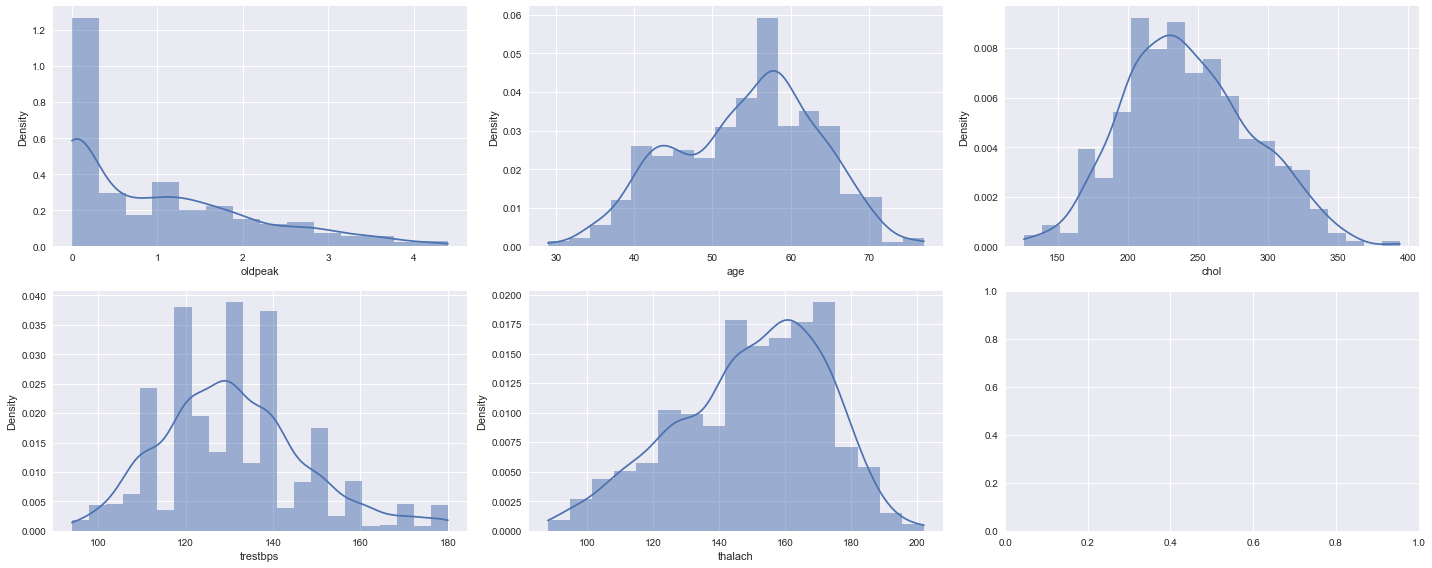

In [192]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i // 3, i % 3], kde=True, stat="density", linewidth=0)
plt.tight_layout()
plt.show()

### Visualizing Features Correlation

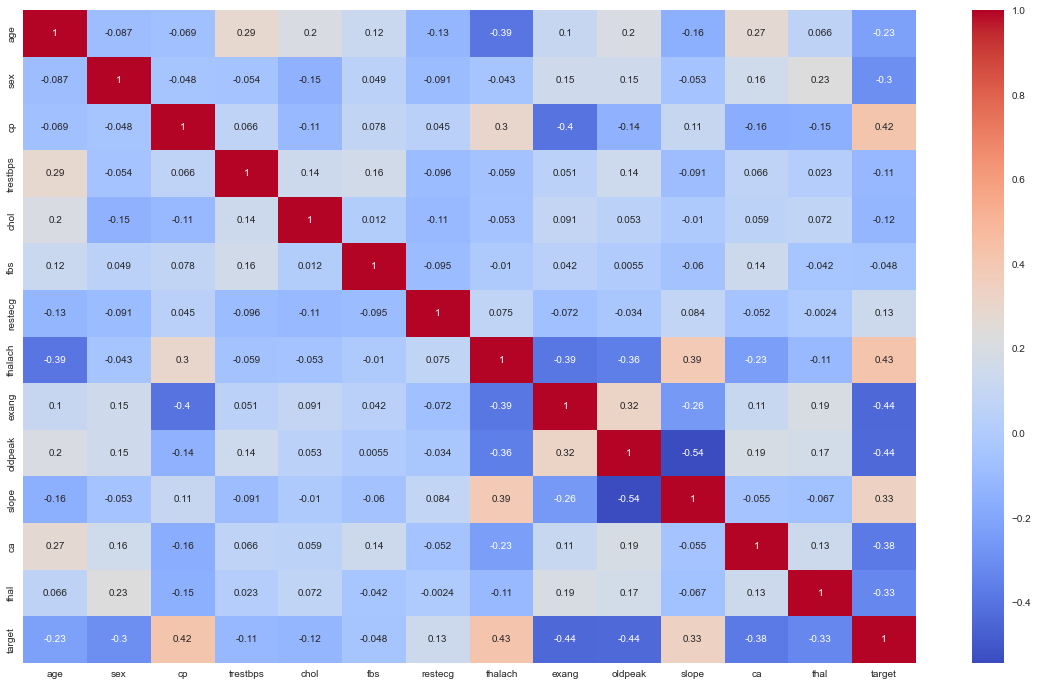

In [193]:
plt.subplots(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

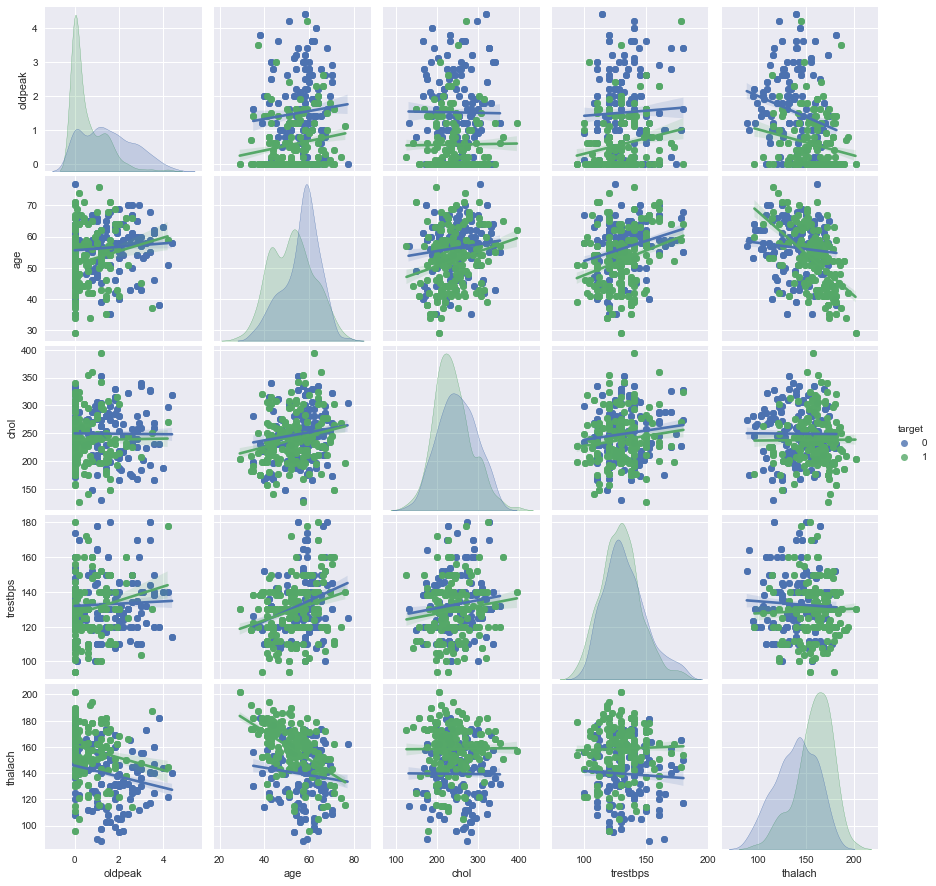

In [194]:
sns.pairplot(df[num_cols + ['target']], kind='reg', hue='target')
plt.show()

## Data Preprocessing

### One Hot Encoding Nominal Categorical Features

In [195]:
for col in nom_cat_cols:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop([col], axis=1, inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [196]:
df.shape

(994, 28)

### MinMax Scaling Numerical Features

In [197]:
mms = MinMaxScaler()

scaled_df = pd.DataFrame(mms.fit_transform(df[num_cols]), columns=num_cols)
scaled_df.head()

,oldpeak,age,chol,trestbps,thalach
0,0.227273,0.479167,0.320896,0.360465,0.701754
1,0.704545,0.500000,0.287313,0.534884,0.587719
2,0.590909,0.854167,0.179104,0.593023,0.324561
3,0.000000,0.666667,0.287313,0.627907,0.640351
4,0.431818,0.687500,0.626866,0.511628,0.157895


In [198]:
df.drop(num_cols, axis=1, inplace=True)
df = pd.concat([df, scaled_df], axis=1).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 993
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        964 non-null    float64
 1   fbs        964 non-null    float64
 2   exang      964 non-null    float64
 3   target     964 non-null    float64
 4   cp_0       964 non-null    float64
 5   cp_1       964 non-null    float64
 6   cp_2       964 non-null    float64
 7   cp_3       964 non-null    float64
 8   restecg_0  964 non-null    float64
 9   restecg_1  964 non-null    float64
 10  restecg_2  964 non-null    float64
 11  slope_0    964 non-null    float64
 12  slope_1    964 non-null    float64
 13  slope_2    964 non-null    float64
 14  ca_0       964 non-null    float64
 15  ca_1       964 non-null    float64
 16  ca_2       964 non-null    float64
 17  ca_3       964 non-null    float64
 18  ca_4       964 non-null    float64
 19  thal_0     964 non-null    float64
 20  thal_1    

In [216]:
# set column 0 until 22 as int
df[df.iloc[:, 0:23].columns] = df.iloc[:, 0:23].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 993
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        964 non-null    int32  
 1   fbs        964 non-null    int32  
 2   exang      964 non-null    int32  
 3   target     964 non-null    int32  
 4   cp_0       964 non-null    int32  
 5   cp_1       964 non-null    int32  
 6   cp_2       964 non-null    int32  
 7   cp_3       964 non-null    int32  
 8   restecg_0  964 non-null    int32  
 9   restecg_1  964 non-null    int32  
 10  restecg_2  964 non-null    int32  
 11  slope_0    964 non-null    int32  
 12  slope_1    964 non-null    int32  
 13  slope_2    964 non-null    int32  
 14  ca_0       964 non-null    int32  
 15  ca_1       964 non-null    int32  
 16  ca_2       964 non-null    int32  
 17  ca_3       964 non-null    int32  
 18  ca_4       964 non-null    int32  
 19  thal_0     964 non-null    int32  
 20  thal_1    

In [217]:
df.head()

,sex,fbs,exang,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,oldpeak,age,chol,trestbps,thalach
0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0.227273,0.479167,0.320896,0.360465,0.701754
1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.704545,0.500000,0.287313,0.534884,0.587719
2,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0.590909,0.854167,0.179104,0.593023,0.324561
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0.000000,0.666667,0.287313,0.627907,0.640351
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0.431818,0.687500,0.626866,0.511628,0.157895


## Prepare Training Data

In [219]:
X = df.drop(['target'], axis=1)
y = df['target']

print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (964, 27)
y Shape: (964,)


In [221]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (771, 27)
y_train Shape: (771,)
X_test Shape: (193, 27)
y_test Shape: (193,)


## Defining Model

In [229]:
trial = {
    "gradient_descent": {
        "label": "Gradient Descent (batch size = len(X_train))",
        "lr": 0.01,
        "batch_size": len(X_train),
    },
    "stochastic_gradient_descent": {
        "label": "Stochastic Gradient Descent (batch_size = 1)",
        "lr": 0.01,
        "batch_size": 1,
    },
    "stochastic_gradient_descent_lr_001": {
        "label": "Stochastic Gradient Descent (batch_size = 1, lr = 0.001)",
        "lr": 0.001,
        "batch_size": 1,
    },
    "mini_batch_gradient_descent": {
        "label": "Mini-Batch Gradient Descent (batch_size = 32, lr = 0.01)",
        "lr": 0.01,
        "batch_size": 32,
    },
}


In [227]:
def eval_model(model):
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Train: {train_acc:.3f}, Test: {test_acc:.3f}")

In [228]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Valid')
    plt.legend()
    plt.show()

In [235]:
def trial_model(lr, batch_size):
    model = Sequential()

    # input layer, that's why input_dim has to be the same as the number of columns in X
    # 1st hidden layer
    # hidden layer usually uses relu activation function because it's proven to be the best function
    model.add(Dense(12, input_dim=27, activation="relu"))

    # 2nd hidden layer
    model.add(Dense(8, activation="relu"))

    # output layer
    # using sigmoid as activation function, because the target is binary classification
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy",
        optimizer=SGD(lr=lr, momentum=0.9),
        metrics=["accuracy"],
    )
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=200,
        verbose=0,
    )
    eval_model(model)
    plot_history(history)
    return model

Gradient Descent (batch size = len(X_train))


d:\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8394
Train: 0.866, Test: 0.839


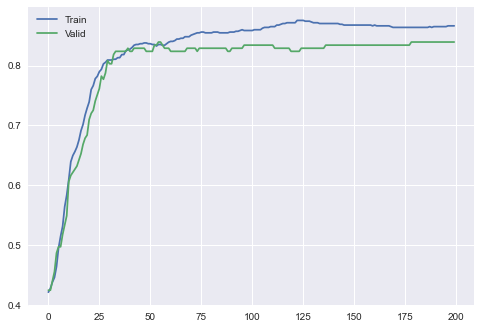

----------------------------------------

Stochastic Gradient Descent (batch_size = 1)


d:\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9326
Train: 0.961, Test: 0.933


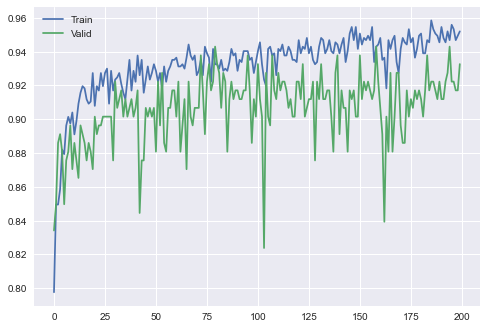

----------------------------------------

Stochastic Gradient Descent (batch_size = 1, lr = 0.001)


d:\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.9119
Train: 0.982, Test: 0.912


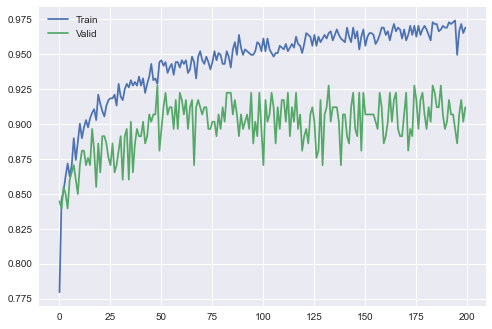

----------------------------------------

Mini-Batch Gradient Descent (batch_size = 32, lr = 0.01)


d:\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9171
Train: 0.973, Test: 0.917


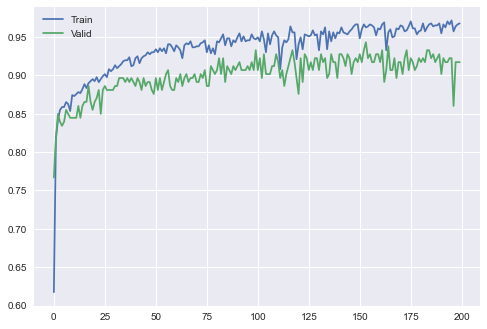

----------------------------------------



In [236]:
for key, params in trial.items():
    print(f"{params['label']}")
    trial_model(params["lr"], params["batch_size"])
    print(40*"-", end="\n\n")

**Observations:**
- Seems like the best model is Mini-Batch Gradient Descent (batch_size = 32, lr = 0.01), because its score is one of the highest and the graph of train and test data is almost fit.

In [242]:
def fit_model(n_batch):
    # define model
    model = Sequential()
    model.add(Dense(12, input_dim=27, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=SGD(learning_rate=0.01, momentum=0.9),
        metrics=["accuracy"],
    )
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

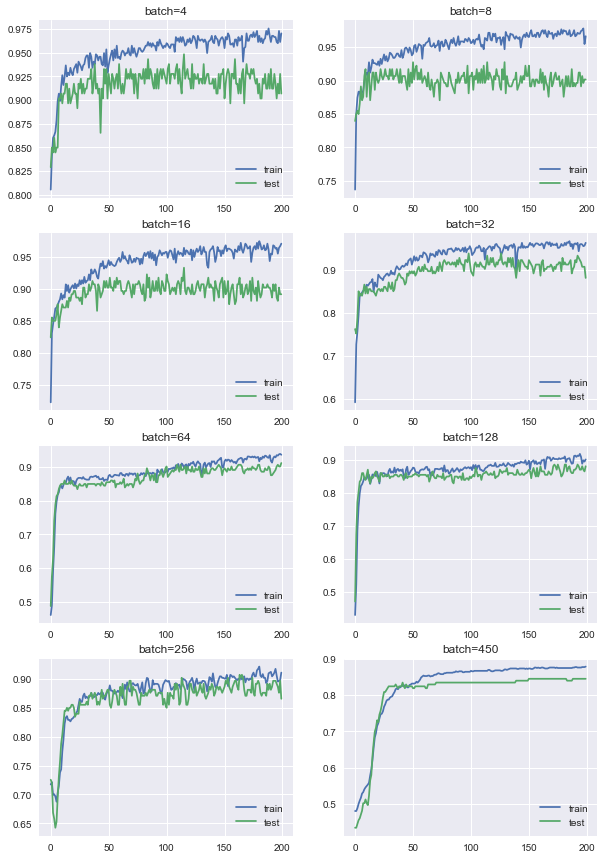

In [243]:
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(batch_sizes[i])

# show learning curves
plt.show()

**Observations:**
- It seems that batch=64 is the best batch size.

## Defining Final Model

d:\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9016
Train: 0.944, Test: 0.902


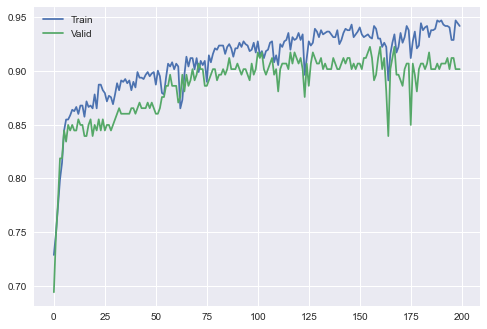

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 12)                336       
                                                                 
 dense_88 (Dense)            (None, 8)                 104       
                                                                 
 dense_89 (Dense)            (None, 1)                 9         
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [244]:
model = trial_model(0.01, 64)
model.summary()